# Haberman Cancer Survival EDA

Today we will be working with the Haberman Cancer Survival Dataset

Abstract: Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer

Download Haberman Cancer Survival dataset.\
<https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival>

Data Set Information:

    The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)\
    -- 1 = the patient survived 5 years or longer\
    -- 2 = the patient died within 5 year


Covered Here:

    High level explanations of the dataset: data-points, features, classes, data-points per class.\
    Explain our objective.
    Perform Univaraite analysis (PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.\
    Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

Only the EDA section of the Dataset has been covered here.\
Modeling a Logarithmic Regression will be posted later.

##### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set_style("whitegrid")
%matplotlib inline

##### Read the dataset

In [2]:
df = pd.read_csv("haberman.csv")
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
df.shape

(305, 4)

Here we can see that we have a total of 4 features.\
And a total of 305 datapoints

In [4]:
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Here, we can see that total of 305 non-null data-points each exists for each feature.\
Also, all the data-points are of int64 class.

No Null/Missing Values in any datapoints.

## About the Dataset

A quick google search on Haberman's Cancer Survival Dataset provides the following information:

Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
- Age of patient at the time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive auxillary nodes detected (numerical)
- Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

Thus, we can map the features to their attributes as:
- 30:  Age of patient at the time of operation (numerical)
- 64:  Patient's year of operation (year - 1900, numerical)
- 1:   Number of positive auxillary nodes detected (numerical)
- 1.1: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

### Looking into Features and Feature Category

##### Check for unique values in Axillary Nodes, and Survival status

In [6]:
print(df['1'].value_counts())

0     136
1      40
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: 1, dtype: int64


In [7]:
print(df['1.1'].value_counts())

1    224
2     81
Name: 1.1, dtype: int64


### Observations

Thus we notice that feature '1' is not a categorical variable as there are quite many unique values.\
However, feature '1.1' is a categorical variable, which can have values either "1" or "2".\
"1": means the patient survived 5 years or longer.\
"2": means the patient died before 5 years.

Thus from here, we can conclude that the feature '1.1' is our dependent variable, and we should convert the type of the feature from int64 to categorical values:\
"YES" if the value=1: Patient survived 5 years or more.\
"NO" if the value=2: Patient died before 5 years

Also, this is not a balanced dataset as there are nearly 3 times the number of patients that survived compared to the patients who died. \
Ofcourse, one might argue that in real-world there are millions of people who are suffering from breast cancer, but this analysis shall only be done on the subjects in this dataset and no relation or resemblance to anyone else. \
A Balanced dataset always provides a greater and wide perception of all possible cases

##### Converting feature 1.1 to categorical type

In [8]:
df['1.1'] = df['1.1'].map({1: "YES",
              2: "NO"})
df.head()

,30,64,1,1.1
0,30,62,3,YES
1,30,65,0,YES
2,31,59,2,YES
3,31,65,4,YES
4,33,58,10,YES


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   30      305 non-null    int64 
 1   64      305 non-null    int64 
 2   1       305 non-null    int64 
 3   1.1     305 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [10]:
df['1.1'].value_counts()

YES    224
NO      81
Name: 1.1, dtype: int64

Thus we have successfully converted our feature '1.1' to YES or NO - categorical variable

### Objective: Find the survivality of any patient owing to breast cancer detection

We can now very well define our objective to finding whether any person who has breast cancer, is likely to survive more than 5 years or less than 5 years depending on other features from the dataset.

But in order to find which are the most useful features which shall help us detecting the survivality, we need to perform more analysis.\
Let's try to figure that out

## Feature Selection

In order to understand which features are significant, let's perform some analysis on the data.

### Univariate Analysis

#### PDF Plots

Text(0.5, 1, "Fig 1: PDF of '30'")

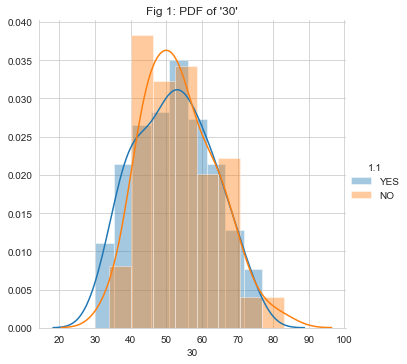

In [11]:
sns.FacetGrid(df, hue='1.1', height=5).map(sns.distplot, "30").add_legend()
plt.title("Fig 1: PDF of '30'")

#### Observations:

- There is huge overlap of patients survivality which predicts age is not a great feature to predict survivality
- Patients with ages between 30 to 40 had more chances of survival for more than 5 years
- Patients with ages between 40 to 50 had lesser chances of survival for more than 5 years
- Patients with ages between 50 to 65 had equal chances of survival for more than 5 years

Yet we can confirm any of the observations without probing deep into the situation

Text(0.5, 1, "Fig 2: PDF of '64'")

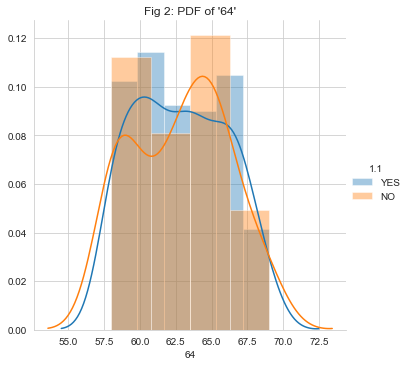

In [12]:
sns.FacetGrid(df, hue='1.1', height=5).map(sns.distplot, "64").add_legend()
plt.title("Fig 2: PDF of '64'")

#### Observations:

- There is huge overlap of patients based on the year of operation, suggesting it is not a great feature
- People who were operated between 1961-1963 had more chances of surviving more than 5 years
- It is very hard to predict any survivality with this feature

Text(0.5, 1, "Fig 3: PDF of '1'")

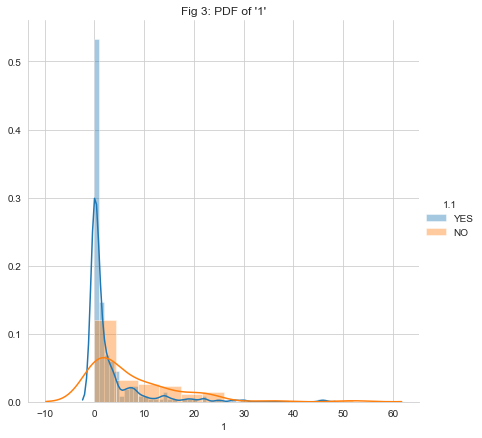

In [13]:
sns.FacetGrid(df, hue='1.1', height=6).map(sns.distplot, "1").add_legend()
plt.title("Fig 3: PDF of '1'")

#### Observations:

- There is lesser overlap for survivality and we can see survival peak around 0-1
- Patients which had less than or equal to 1 axillary nodes survived more than 5 years
- There is less probability of survival for patients who had more than 23 nodes.
- There is an outlier of patient who had more than 45 nodes and still survived for more than 5 years
- This feature could be the most important feature, as it clearly distinguishes the survival and mortality when auxillary nodes are less than equal to 1, but we will continue to investigate more into this.

#### CDF Plots

Text(0.5, 1.0, 'Fig 4: PDF & CDF of 30')

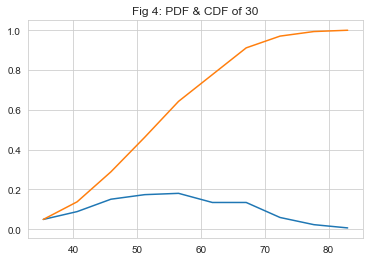

In [14]:
count_30, bin_edges_30 = np.histogram(df['30'], bins=10, density=True)
pdf_30 = count_30/sum(count_30)
cdf_30 = np.cumsum(pdf_30)
plt.plot(bin_edges_30[1:], pdf_30)
plt.plot(bin_edges_30[1:], cdf_30)
plt.title("Fig 4: PDF & CDF of 30")

Text(0.5, 1.0, 'Fig 5: PDF & CDF of 64')

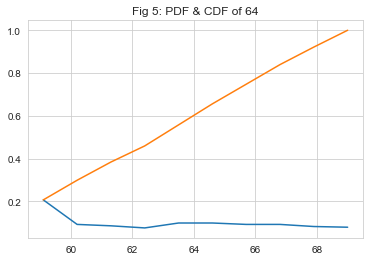

In [15]:
count_64, bin_edges_64 = np.histogram(df['64'], bins=10, density=True)
pdf_64 = count_64/sum(count_64)
cdf_64 = np.cumsum(pdf_64)
plt.plot(bin_edges_64[1:], pdf_64)
plt.plot(bin_edges_64[1:], cdf_64)
plt.title("Fig 5: PDF & CDF of 64")

Text(0.5, 1.0, 'Fig 6: PDF & CDF of 1')

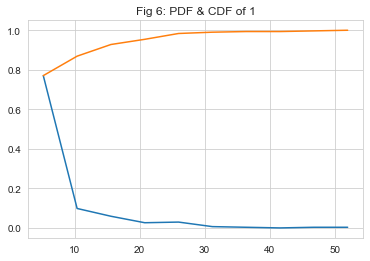

In [16]:
count_1, bin_edges_1 = np.histogram(df['1'], bins=10, density=True)
pdf_1 = count_1/sum(count_1)
cdf_1 = np.cumsum(pdf_1)
plt.plot(bin_edges_1[1:], pdf_1)
plt.plot(bin_edges_1[1:], cdf_1)
plt.title("Fig 6: PDF & CDF of 1")

From the above PDF and CDF plot, it is quite evident that Feature '1' (see Fig 3) is quite important than the other two, but we will explore this using various other plots to be sure.\
For now, we will try to plot the PDF and CDF of Survivality based on the number of auxillary nodes (because we think it is important)

Text(0.5, 1.0, 'Fig 7: Survivality PDF-CDF on nodes')

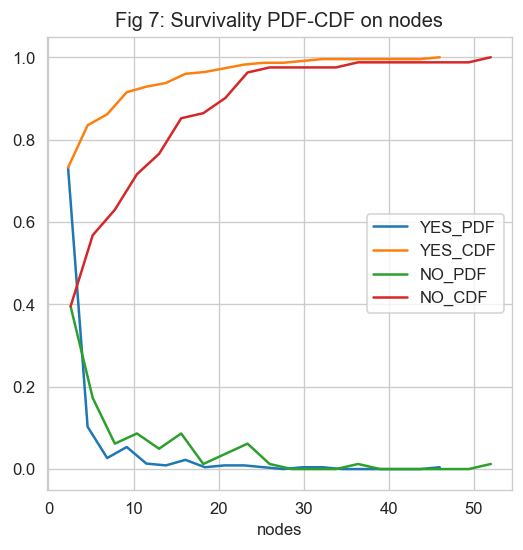

In [17]:
figure(figsize=(5, 5), dpi=120)

survived_more = df.loc[df['1.1'] == 'YES']
survived_less = df.loc[df['1.1'] == 'NO']

count_sur_m, bin_edges_sur_m = np.histogram(survived_more['1'], bins=20, density=True)
pdf_sur_m = count_sur_m / sum(count_sur_m)
cdf_sur_m = np.cumsum(pdf_sur_m)
plt.plot(bin_edges_sur_m[1:], pdf_sur_m, label='YES_PDF')
plt.plot(bin_edges_sur_m[1:], cdf_sur_m, label='YES_CDF')

count_sur_l, bin_edges_sur_l = np.histogram(survived_less['1'], bins=20, density=True)
pdf_sur_l = count_sur_l / sum(count_sur_l)
cdf_sur_l = np.cumsum(pdf_sur_l)
plt.plot(bin_edges_sur_l[1:], pdf_sur_l, label='NO_PDF')
plt.plot(bin_edges_sur_l[1:], cdf_sur_l, label='NO_CDF')

plt.xlabel("nodes")
plt.legend()
plt.title("Fig 7: Survivality PDF-CDF on nodes")

#### Observation:

<h4>75% of the patients who survived, had nodes lesser than 7; and around 60% had nodes lesser than 5

#### Box Plot and Violin Plot

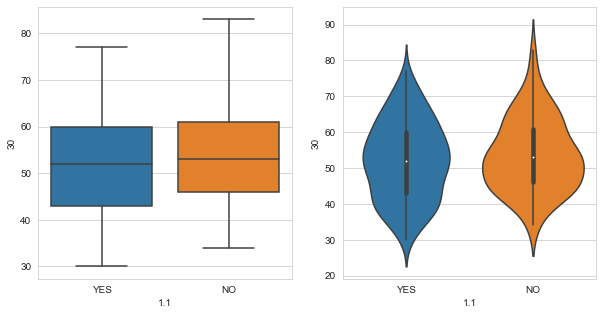

In [18]:
figure(num='Fig 8', figsize=(10, 5))

plt.subplot(1,2,1)
sns.boxplot(x='1.1', y='30', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='1.1',y='30',data=df)

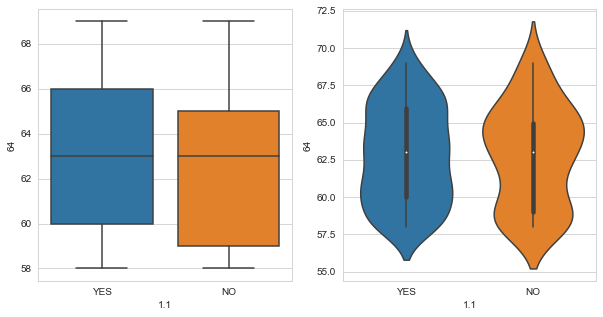

In [19]:
figure(num='Fig 9', figsize=(10, 5))

plt.subplot(1,2,1)
sns.boxplot(x='1.1', y='64', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='1.1',y='64',data=df)

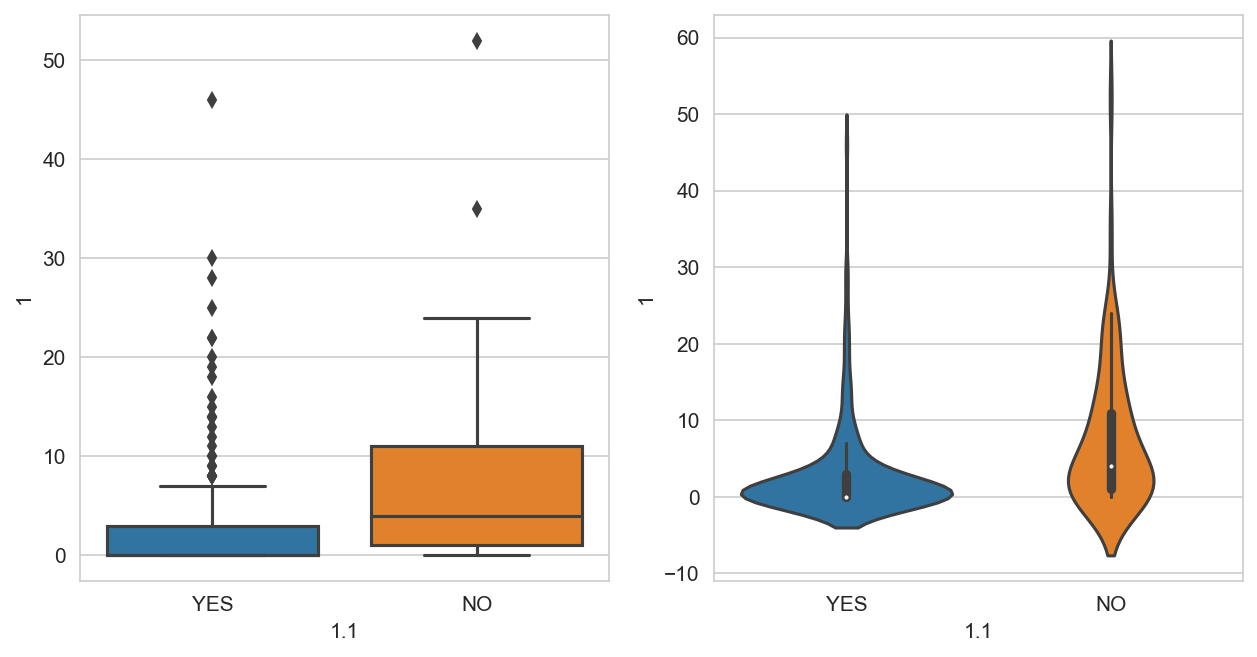

In [20]:
figure(num='Fig 10', figsize=(10, 5), dpi=150)

plt.subplot(1,2,1)
sns.boxplot(x='1.1', y='1', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='1.1',y='1',data=df)

In [21]:
df['1'].describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: 1, dtype: float64

### Observations

From the above plots, it is very clear that the most important feature is definitely Feature '1'.

- From Fig 10: It is evident that people who had axillary nodes <= 1 had more chances of surviving 5 years or more 
- where as people with more than 4 axillary nodes did not survive for more than 5 years
- Majority of the people who survived had 0 to 1 nodes only.

- From Fig 9: It is reasonable to say that operations performed on majority of people before 1965 did not survive

- From Fig 8: While people less than age of 45 had more chances of survival, people between age of 45-60 were more prone to death

### Bivariate Analysis

Now that we know, nodes might be a key feature, we shall perform bi-variate analysis with node as one of the selected features

#### Scatter Plot

Text(0.5, 1, 'Fig 11: Age vs Node Plot')

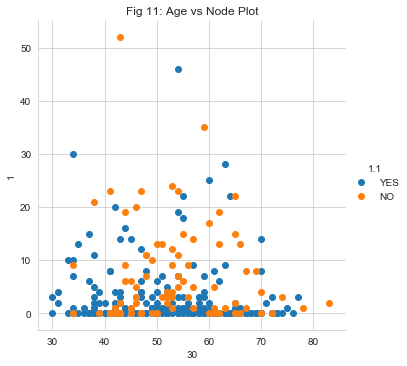

In [22]:
sns.FacetGrid(df, hue='1.1', height=5).map(plt.scatter, "30", "1").add_legend()
plt.title("Fig 11: Age vs Node Plot")

Text(0.5, 1, 'Fig 12: Year vs Node Plot')

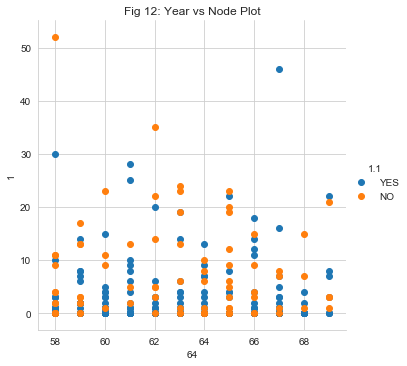

In [23]:
sns.FacetGrid(df, hue='1.1', height=5).map(plt.scatter, "64", "1").add_legend()
plt.title("Fig 12: Year vs Node Plot")

#### Observation:

We reinstate our previous observations, but from these two plots, we can clear see some outliers of people who survived.\
As we stated before that Feature '1' or Auxillary Nodes, is a important feature as it helps mostly in determining the survivality based on value, might not be completely true.\
There are ranged values and outliers definitely, but that doesn't ensure anything.

#### Pair Plot

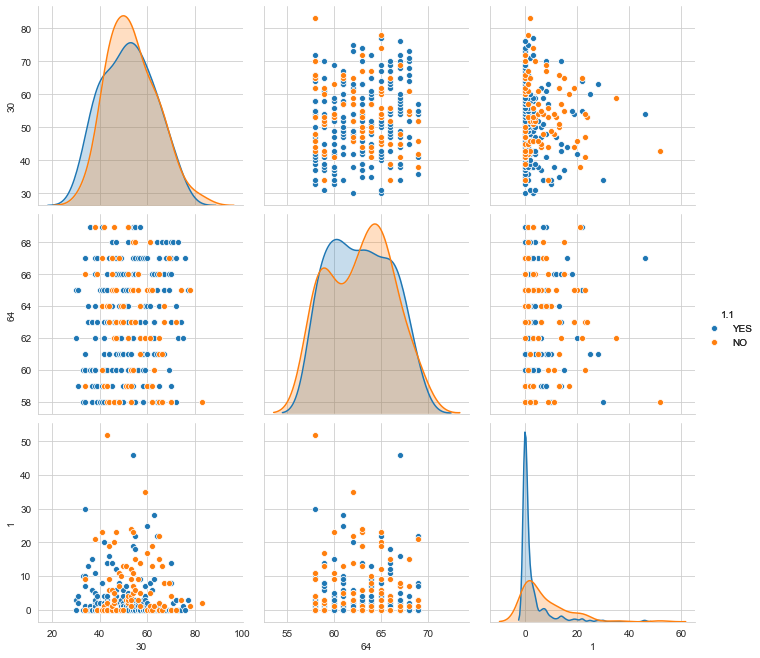

In [24]:
sns.pairplot(df, hue='1.1', height=3).add_legend()

From this pair-plot we notice that Feature '30' vs Feature '1' scatter plot is the most important feature set, after the Auxillary Node (Feature '1') itself.\
We see huge overlaps in the Survived and Death curves for all features except Auxillary Node, where we have a peak high chance of survival, and we should consider this as the best case scenario of a person to survive.

### Multi-variate Analysis

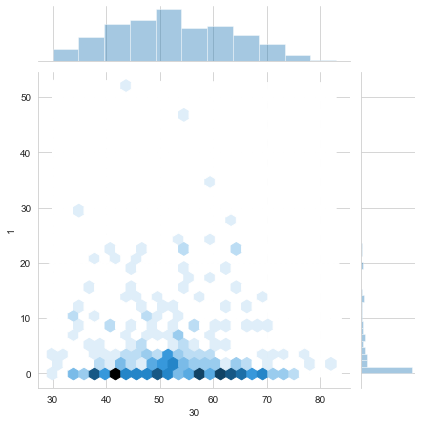

In [25]:
sns.jointplot(x="30", y="1", data=df, kind="hex")

### Conclusion

Majority of people of who survived had lesser Auxillary Nodes\
Important Feature Labels in decreasing order of priority: '1' >> '30' >> '64'

Also, since the spread of all the features as quite wide, we should consider logarithmic modeling of the dataset.\
Also, from the Join Plot, we can see a large cumulation of data-points near the position 0. \
Which suggests a high dependency of the features at intervals (0,1]. \
We should consider log1p modeling from numpy package while modeling this dataset as it would provide a greater clarity.